In [1]:
# Original data can be found here: https://www.uvic.ca/ecs/ece/isot/datasets/fake-news/index.php
from google.colab import drive
drive.mount('/content/drive')
# Import necessary Python libraries, modules, etc.
import time # for generating timestamps 
import re # for regular expressions
import string as st # for removing punctuation
import numpy as np # for linear algebra
import pandas as pd # for frame processing
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns
import pickle
import nltk # for natural language processing
from nltk.corpus import stopwords # for removing english stopwords
from nltk.stem import WordNetLemmatizer # for term stemming
import sklearn # for predictive data analysis
from sklearn import preprocessing # for data preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split # for splitting data into test/train sets
from sklearn.feature_extraction.text import TfidfVectorizer # for text vectorization
from wordcloud import WordCloud, ImageColorGenerator
from IPython.core.interactiveshell import InteractiveShell # to modify Jupyter notebook configuration
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
InteractiveShell.ast_node_interactivity = "all" # so that all outputs in a cell are returned (instead of last instance)

Mounted at /content/drive


### Load data

In [2]:
# true_news = pd.read_csv('true.csv')
# fake_news = pd.read_csv('fake.csv')
true_news = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/True.csv')
fake_news = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Fake.csv')

In [3]:
true_news

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [4]:
fake_news

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [5]:
true_news['label'] = 'true'  # add an extra column (named "label") to the true_news dataframe and assign true to all row in this column
fake_news['label'] = 'fake' # add an extra column (named "label") to the fake_news dataframe and assign fake to all row in this column

In [6]:
true_news

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true


In [9]:
#compare the labels to see if the data is balanced
print(' true_news[label].value_counts(): ', true_news['label'].value_counts())
print(' fake_news[label].value_counts() : ', fake_news['label'].value_counts())

 true_news[label].value_counts():  true    21417
Name: label, dtype: int64
 fake_news[label].value_counts() :  fake    23481
Name: label, dtype: int64


In [10]:
#randomly remove (n = 2064) rows from the fake_news data frame to balance the labels
np.random.seed(5) #you can also use np.random.seed(1) This displays the same random numbers. 
fake_news = fake_news.drop(np.random.choice(fake_news.index, 2064, replace=False))

#compare the labels to see if the data is balanced
print(true_news['label'].value_counts())
print(fake_news['label'].value_counts())

true    21417
Name: label, dtype: int64
fake    21417
Name: label, dtype: int64


In [11]:
news_data = pd.concat([true_news,fake_news]) # concatenate the fake_news and true_news dataframe 
news_data

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",fake
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",fake


### Label data

In [13]:
news_data['target'] = LabelEncoder().fit_transform(news_data['label'])  # add an extra column (named "target") which is a transformation of the "label" column from text (true or fake) to numbers (1 or 0) using Labelencoder, fit_transform method
print(news_data.head())



                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date label  target  
0  December 31, 2017   true       1  
1  December 29, 2017   true       1  
2  December 31, 2017   true       1  
3  December 30, 2017   true       1  
4  December 29, 2017   true       1  


In [14]:
news_data['text'] = news_data['title'] + news_data['text'] # merge the "title" and "text" to replace the "text" column
news_data = news_data[['text','target']] #isolate the merged "text" and the "target" column
print(news_data)

                                                    text  target
0      As U.S. budget fight looms, Republicans flip t...       1
1      U.S. military to accept transgender recruits o...       1
2      Senior U.S. Republican senator: 'Let Mr. Muell...       1
3      FBI Russia probe helped by Australian diplomat...       1
4      Trump wants Postal Service to charge 'much mor...       1
...                                                  ...     ...
23476  McPain: John McCain Furious That Iran Treated ...       0
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...       0
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...       0
23479  How to Blow $700 Million: Al Jazeera America F...       0
23480  10 U.S. Navy Sailors Held by Iranian Military ...       0

[42834 rows x 2 columns]


### Data preprocessing

In [16]:
# Define function for cleaning data
wnl = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

#this would act on every text in each row (pre-processing the text)
def data_cleaning(text):
    text = text.lower() # to convert the text to lowercase
    text = re.sub('[^a-zA-Z]', ' ',text) # to remove number and special characters 
    text = text.split()  #to tokenize the text
    text = [wnl.lemmatize(word) for word in text if not word in stop_words] #to lemmatize and remove stopwords
    text = [word for word in text if len(word) >=3] #remove 3 or less characters; only keep words of length greater than 3
    text = ' '.join(text) #to join all tokenized words
    return text


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
news_data['text'] = news_data['text'].apply(lambda x: data_cleaning(x))  # apply this to every row in the text column

<ipython-input-17-159dac49db0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data['text'] = news_data['text'].apply(lambda x: data_cleaning(x))  # apply this to every row in the text column


In [18]:
print("news_data :\n",news_data )

news_data :
                                                     text  target
0      budget fight loom republican flip fiscal scrip...       1
1      military accept transgender recruit monday pen...       1
2      senior republican senator let mueller job wash...       1
3      fbi russia probe helped australian diplomat ti...       1
4      trump want postal service charge much amazon s...       1
...                                                  ...     ...
23476  mcpain john mccain furious iran treated sailor...       0
23477  justice yahoo settle mail privacy class action...       0
23478  sunnistan allied safe zone plan take territori...       0
23479  blow million jazeera america finally call quit...       0
23480  navy sailor held iranian military sign neocon ...       0

[42834 rows x 2 columns]


### Splitting data

In [20]:
X = news_data.iloc[:, 0]
y = news_data.iloc[:, 1]
train_data, test_data, train_target, test_target = train_test_split(X, y, random_state = 5, train_size = 0.80) #here you can set random state to 0,1,5 etc. you will have same result for each run. However, setting this to 'None' would yield different results.

### Vectorization

In [21]:
# with max_features=1000 and ngram_range=(1,3) further search for combinations of optimal hyperparameters of 4 classifiers
vectorizer = TfidfVectorizer(max_features=1000, lowercase=False, ngram_range=(1,3))

In [22]:
vec_train_data = vectorizer.fit_transform(train_data).toarray()

In [26]:
vec_train_data
print("\n\nvec_train_data.shape :",vec_train_data.shape )

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.05579614],
       [0.        , 0.        , 0.        , ..., 0.03883729, 0.        ,
        0.04680571],
       [0.        , 0.        , 0.11367577, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.08861333,
        0.        ]])



vec_train_data.shape : (34267, 1000)


In [27]:
vec_test_data = vectorizer.fit_transform(test_data).toarray()

In [28]:
vec_test_data
print("\n\nvec_test_data.shape :",vec_test_data.shape )

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.09892495,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.05316377, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])



vec_test_data.shape : (8567, 1000)


# Multinomial Naive Bayes Classifier 

In [29]:
# do randomized search for optimal hyperparameters of MultinomialNB classifier
parameters = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
model_MNB = RandomizedSearchCV(MultinomialNB(class_prior=[0.5, 0.5]), parameters,n_jobs = -1, cv= 5, scoring='roc_auc')

model_MNB.fit(vec_train_data, train_target)

df = pd.DataFrame(model_MNB.cv_results_)
print (df[['param_alpha', 'mean_test_score']])
print (f'The best score for MultinomialNB is {model_MNB.best_score_}')
print (f'The best set of MultinomialNB hyperparameters are {model_MNB.best_params_}')

RandomizedSearchCV(cv=5, estimator=MultinomialNB(class_prior=[0.5, 0.5]),
                   n_jobs=-1,
                   param_distributions={'alpha': [1e-05, 0.0005, 0.0001, 0.005,
                                                  0.001, 0.05, 0.01, 0.1, 0.5,
                                                  1, 5, 10, 50, 100]},
                   scoring='roc_auc')

  param_alpha  mean_test_score
0      0.0005         0.983612
1       0.001         0.983567
2        0.05         0.983176
3      0.0001         0.983704
4          10         0.980846
5         100         0.979360
6         0.1         0.983054
7        0.01         0.983380
8           1         0.982348
9         0.5         0.982625
The best score for MultinomialNB is 0.9837039280240593
The best set of MultinomialNB hyperparameters are {'alpha': 0.0001}


### Plotting  Confusion Matrix for the best Hyperparameters of Multinomial  Naive Bayes classifier 

<Figure size 700x500 with 0 Axes>

<Axes: >

Text(0.5, 25.722222222222214, 'Predicted')

Text(58.222222222222214, 0.5, 'Actual')

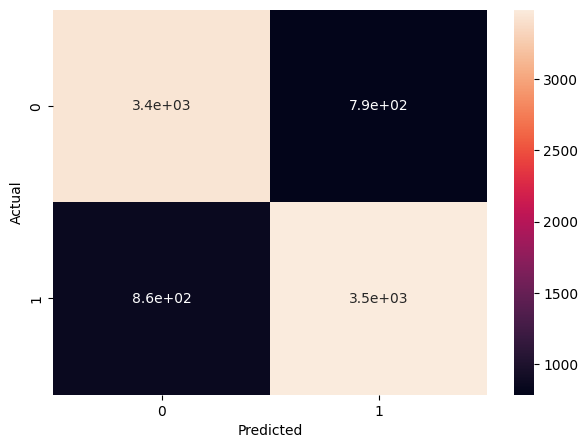

In [30]:
model_MNB = MultinomialNB( alpha =1e-05 ).fit(vec_train_data, train_target)
#Plotting confusion matrix for the best classifier (Logistic Regression)
y_pred = model_MNB.predict(vec_test_data)
cm = confusion_matrix(test_target, y_pred)
plt.figure(figsize = (7, 5))
sns.heatmap (cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [31]:
print(classification_report(test_target, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      4224
           1       0.82      0.80      0.81      4343

    accuracy                           0.81      8567
   macro avg       0.81      0.81      0.81      8567
weighted avg       0.81      0.81      0.81      8567



# Random Forest Classifier

In [32]:
# do randomized search for optimal hyperparameters of Random Forest classifier

from scipy.stats import randint as sp_randint
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "n_estimators":[10, 20,  30,  40, 50, 80,100,150, 200]}

model_RFC = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist,
                                   n_iter=20)
model_RFC.fit(vec_train_data, train_target)

df = pd.DataFrame(model_RFC.cv_results_)
print (df[['param_bootstrap','param_criterion','param_max_depth','param_max_features','param_min_samples_leaf','param_min_samples_split','mean_test_score']])
print (f'The best score for Random Forest Classifier is {model_RFC.best_score_}')
print (f'The best set of Random Forest Classifier hyperparameters are {model_RFC.best_params_}')

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f5df7fffd30>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f5df8024100>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f5de1a2efd0>,
                                        'n_estimators': [10, 20, 30, 40, 50, 80,
                                                         100, 150, 200]})

   param_bootstrap param_criterion param_max_depth param_max_features  \
0             True         entropy            None                  7   
1            False            gini            None                  9   
2            False            gini               3                  5   
3            False            gini               3                  2   
4            False         entropy            None                  8   
5            False         entropy            None                  7   
6            False            gini               3                  2   
7             True            gini               3                  4   
8             True         entropy            None                  3   
9            False            gini               3                 10   
10            True            gini            None                 10   
11           False            gini               3                  7   
12           False            gini            None 

### Plotting Confusion Matrix for the best Hyperparameters of Random Forest Classifier

<Figure size 700x500 with 0 Axes>

<Axes: >

Text(0.5, 25.722222222222214, 'Predicted')

Text(58.222222222222214, 0.5, 'Actual')

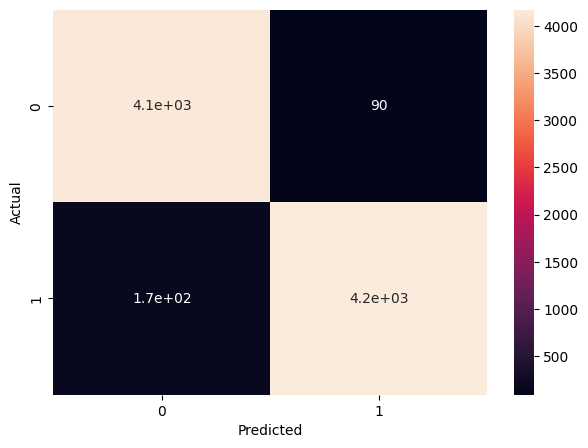

In [33]:
#Plotting confusion matrix for the best classifier (Random forest)
y_pred = model_RFC.predict(vec_test_data)
cm = confusion_matrix(test_target, y_pred)
plt.figure(figsize = (7, 5))
sns.heatmap (cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [34]:
print(classification_report(test_target, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4224
           1       0.98      0.96      0.97      4343

    accuracy                           0.97      8567
   macro avg       0.97      0.97      0.97      8567
weighted avg       0.97      0.97      0.97      8567



# Logistic Regression

In [35]:
# do randomized search for optimal hyperparameters of Logistic Regression classifier
from scipy.stats import loguniform
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2']
space['C'] = loguniform(1e-5, 100)
model_LRC = RandomizedSearchCV(LogisticRegression(), space, n_iter=20, scoring='accuracy', n_jobs=-1, cv=5, random_state=1)

model_LRC.fit(vec_train_data, train_target)

df = pd.DataFrame(model_LRC.cv_results_)
print (df[['param_C', 'param_penalty','param_solver','mean_test_score']])
print (f'The best score for Logistics regression is {model_LRC.best_score_}')
print (f'The best set of Logistic Regression Classifier hyperparameters are {model_LRC.best_params_}')

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver n

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f5de30f81f0>,
                                        'penalty': ['none', 'l1', 'l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   random_state=1, scoring='accuracy')

      param_C param_penalty param_solver  mean_test_score
0    0.008301          none    newton-cg         0.990282
1     0.00001            l1    newton-cg              NaN
2    0.000044          none        lbfgs         0.990924
3    0.487778            l1    liblinear         0.993551
4    8.398011            l1    liblinear         0.994718
5    0.046972          none    liblinear              NaN
6    0.000405            l2    liblinear         0.922520
7   24.988154            l1        lbfgs              NaN
8    0.000096          none    liblinear              NaN
9    4.029136            l1        lbfgs              NaN
10   0.701873            l1    newton-cg              NaN
11  18.291387          none    newton-cg         0.990282
12   0.000019            l2        lbfgs         0.503867
13   0.493965            l2        lbfgs         0.981119
14    0.00763          none    newton-cg         0.990282
15   0.001617          none    liblinear              NaN
16   6.956322 

### Plotting Confusion Matrix for the best Hyperparameters of  Logistic Regression 

In [36]:
model_LRC = LogisticRegression( penalty = 'l1', C=8.3980, solver= 'liblinear' ).fit(vec_train_data, train_target)

<Figure size 700x500 with 0 Axes>

<Axes: >

Text(0.5, 25.722222222222214, 'Predicted')

Text(58.222222222222214, 0.5, 'Actual')

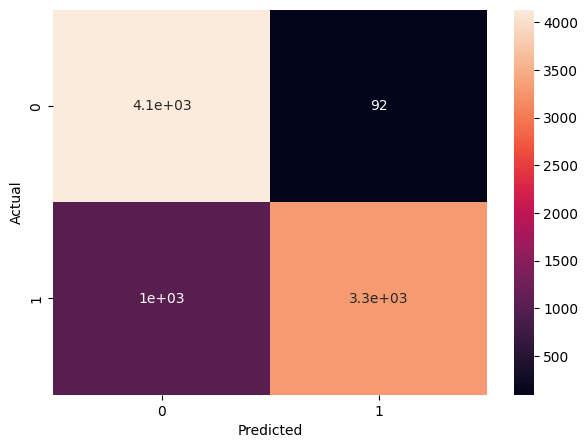

In [37]:
#Plotting confusion matrix for the best classifier (Logistic Regression)
y_pred = model_LRC.predict(vec_test_data)
cm = confusion_matrix(test_target, y_pred)
plt.figure(figsize = (7, 5))
sns.heatmap (cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [38]:
print(classification_report(test_target, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      4224
           1       0.97      0.76      0.85      4343

    accuracy                           0.87      8567
   macro avg       0.89      0.87      0.87      8567
weighted avg       0.89      0.87      0.87      8567

